In [2]:
from skimage.io import imshow, imsave, imread
from skimage import img_as_float
from skimage.color import rgb2gray, rgb2hsv, hsv2rgb
from numpy import dstack
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import ipywidgets as widgets
import math

In [69]:
def set_hsv(h, s, v):
    path = "marvel.jpg"
    img = rgb_to_hsv(path)
    for colors in img:
        for color in colors:
            color[0] = (color[0]+ h) % 360
            
            if color[1] + s > 1:
                color[1] = 1
            else:
                color[1] = color[1] + s
                
            if color[2] + v > 1:
                color[2] = 1
            else:
                color[2] = color[2] + v  
    return imshow(hsv_to_rgb(img))

def save_hsv(h, s, v):
    path = "marvel.jpg"
    img = rgb_to_hsv(path)
    for colors in img:
        for color in colors:
            color[0] = (color[0]+ h) % 360
            
            if color[1] + s > 1:
                color[1] = 1
            else:
                color[1] = color[1] + s
                
            if color[2] + v > 1:
                color[2] = 1
            else:
                color[2] = color[2] + v
    return hsv_to_rgb(img)


def rgb_to_hsv(path):
    img = imread(path)
    float_img = img/255
    for colors in float_img:
        for color in colors:
            r = color[0]
            g = color[1]
            b = color[2]
            max_color = color.max()
            min_color = color.min()
            
            if max_color == min_color:
                h = 0
            elif max_color == r and g >= b:
                h = 60 * (g - b) / (max_color - min_color)
            elif max_color == r and g < b:
                h = 60 * (g - b) / (max_color - min_color) + 360
            elif max_color == g:
                h = 60 * (b - r) / (max_color - min_color) + 120
            elif max_color == b:
                h = 60 * (r - g) / (max_color - min_color) + 240
            
            if max_color == 0:
                s = 0
            else:
                s = 1 - min_color/max_color
            v = max_color
            color[0] = h 
            color[1] = s 
            color[2] = v 
    return float_img
          
def hsv_to_rgb(img):
    for colors in img:
        for color in colors:
            h = color[0]
            s = color[1] * 100
            v = color[2] * 100
            h_i = int(h/60) % 6
            v_min = (100 - s) * v / 100 
            a = (v - v_min) * (h % 60) / 60
            v_inc = v_min + a 
            v_dec = v - a
            
            if h_i == 0:
                r = v
                g = v_inc
                b = v_min
            elif h_i == 1:
                r = v_dec
                g = v
                b = v_min
            elif h_i == 2:
                r = v_min
                g = v
                b = v_inc
            elif h_i == 3:
                r = v_min
                g = v_dec
                b = v
            elif h_i == 4:
                r = v_inc
                g = v_min
                b = v
            elif h_i == 5:
                r = v
                g = v_min
                b = v_dec
            color[0] = r /100 
            color[1] = g /100 
            color[2] = b /100
    return img

# Задание 3. Преобразовать изображение из RGB в HSV. Добавить возможность изменять значения оттенка, насыщенности и яркости. Результат сохранять в файл, предварительно преобразовав обратно.

In [70]:
path = "marvel.jpg"

### Getting HSV

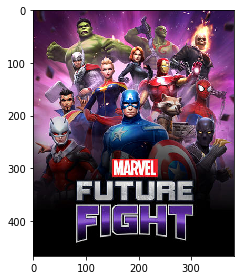

In [71]:
imshow(hsv_to_rgb(rgb_to_hsv(path)))

### Changing HSV

In [72]:
h_text = widgets.FloatText(min=0, max=360, step=1, value=0)
h_slider = widgets.FloatSlider(min=0, max=360, step=1, value=0)

s_text = widgets.FloatText(min=0, max=1, step=0.01, value=0)
s_slider = widgets.FloatSlider(min=0, max=1, step=0.01, value=0)

v_text = widgets.FloatText(min=0, max=1, step=0.01, value=0)
v_slider = widgets.FloatSlider(min=0, max=1, step=0.01, value=0)

print("h")
display(h_text,h_slider)

print("s")
display(s_text,s_slider)

print("v")

display(v_text,v_slider)

out = widgets.interactive_output(set_hsv, {'h': h_slider, 's': s_slider, 'v': v_slider})

display(out)
    
link_h = widgets.jslink((h_text, 'value'), (h_slider, 'value'))
link_s = widgets.jslink((s_text, 'value'), (s_slider, 'value'))
link_v = widgets.jslink((v_text, 'value'), (v_slider, 'value'))

h


FloatText(value=0.0, step=1.0)

FloatSlider(value=0.0, max=360.0, step=1.0)

s


FloatText(value=0.0, step=0.01)

FloatSlider(value=0.0, max=1.0, step=0.01)

v


FloatText(value=0.0, step=0.01)

FloatSlider(value=0.0, max=1.0, step=0.01)

Output()

In [68]:
button = widgets.Button(description='Save image')
out = widgets.Output()
def on_button_clicked(_):
      with out:
          imsave("picture_changed.jpg", save_hsv(h_slider.value,  s_slider.value,  v_slider.value))
button.on_click(on_button_clicked)
widgets.VBox([button,out])